In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


In [2]:
df=pd.read_csv('/kaggle/input/autompg-dataset/auto-mpg.csv')

In [3]:
df=df[df["horsepower"] != '?']
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [4]:
df=df.drop('car name' ,axis=1)


In [5]:
x=df.iloc[: ,1:]
y=df.iloc[: ,0]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15 ,random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense


In [9]:
model =Sequential()
model.add(Dense(128 ,activation='relu' ,input_dim=7))
model.add(Dense(4))
model.add(Dense(1) )         
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,545
Trainable params: 1,545
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse' ,optimizer='sgd' ,metrics='mae')


In [11]:
results=model.fit(x_train , y_train ,epochs=100 , validation_data=(x_test,y_test) ,batch_size = 16,   verbose=2)

Epoch 1/100
21/21 - 1s - loss: 196.7053 - mae: 11.1625 - val_loss: 30.2042 - val_mae: 4.4583 - 1s/epoch - 54ms/step
Epoch 2/100
21/21 - 0s - loss: 38.1873 - mae: 4.7175 - val_loss: 34.3291 - val_mae: 4.5146 - 64ms/epoch - 3ms/step
Epoch 3/100
21/21 - 0s - loss: 19.2088 - mae: 3.2376 - val_loss: 13.0602 - val_mae: 3.0281 - 81ms/epoch - 4ms/step
Epoch 4/100
21/21 - 0s - loss: 15.8461 - mae: 2.9893 - val_loss: 16.7023 - val_mae: 3.0730 - 84ms/epoch - 4ms/step
Epoch 5/100
21/21 - 0s - loss: 14.2317 - mae: 2.8783 - val_loss: 61.0041 - val_mae: 6.5533 - 69ms/epoch - 3ms/step
Epoch 6/100
21/21 - 0s - loss: 16.8280 - mae: 3.2065 - val_loss: 8.0756 - val_mae: 2.3682 - 68ms/epoch - 3ms/step
Epoch 7/100
21/21 - 0s - loss: 24.9440 - mae: 3.7682 - val_loss: 14.1504 - val_mae: 2.9573 - 69ms/epoch - 3ms/step
Epoch 8/100
21/21 - 0s - loss: 11.1615 - mae: 2.4658 - val_loss: 7.6706 - val_mae: 2.2193 - 70ms/epoch - 3ms/step
Epoch 9/100
21/21 - 0s - loss: 16.1037 - mae: 2.9169 - val_loss: 12.0065 - val_ma

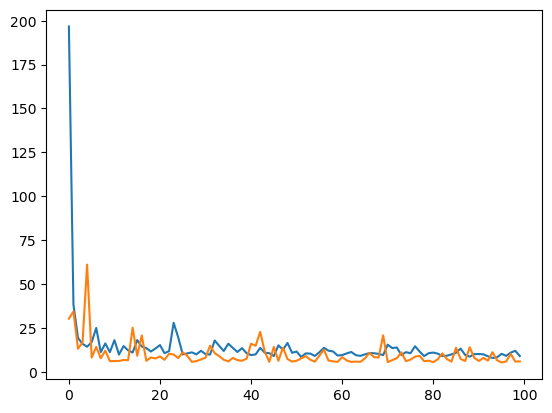

In [12]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

In [13]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [14]:
from sklearn.metrics import r2_score
acc=r2_score(y_test , y_pred)
print('r2_score= ',acc)

r2_score=  0.9000063353255943
